In [6]:
from hossam import *

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from itertools import combinations


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)
from scipy.stats import t, f, shapiro, jarque_bera


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.graphics.gofplots import qqplot as sm_qqplot
import statsmodels.api as sm


In [7]:
origin = load_data("fish_processed")
origin.head()

농어의 길이,높이,두께,무게를 조사한 데이터의 전처리 버전


,길이,높이,두께,무게
0,-2.180225,-2.016507,-1.896175,1.931521
1,-1.587434,-1.518703,-1.560774,3.496508
2,-1.442032,-1.417039,-1.316328,3.713572
3,-1.307815,-1.147103,-1.202633,3.960813
4,-1.173599,-1.147103,-1.026405,4.262680


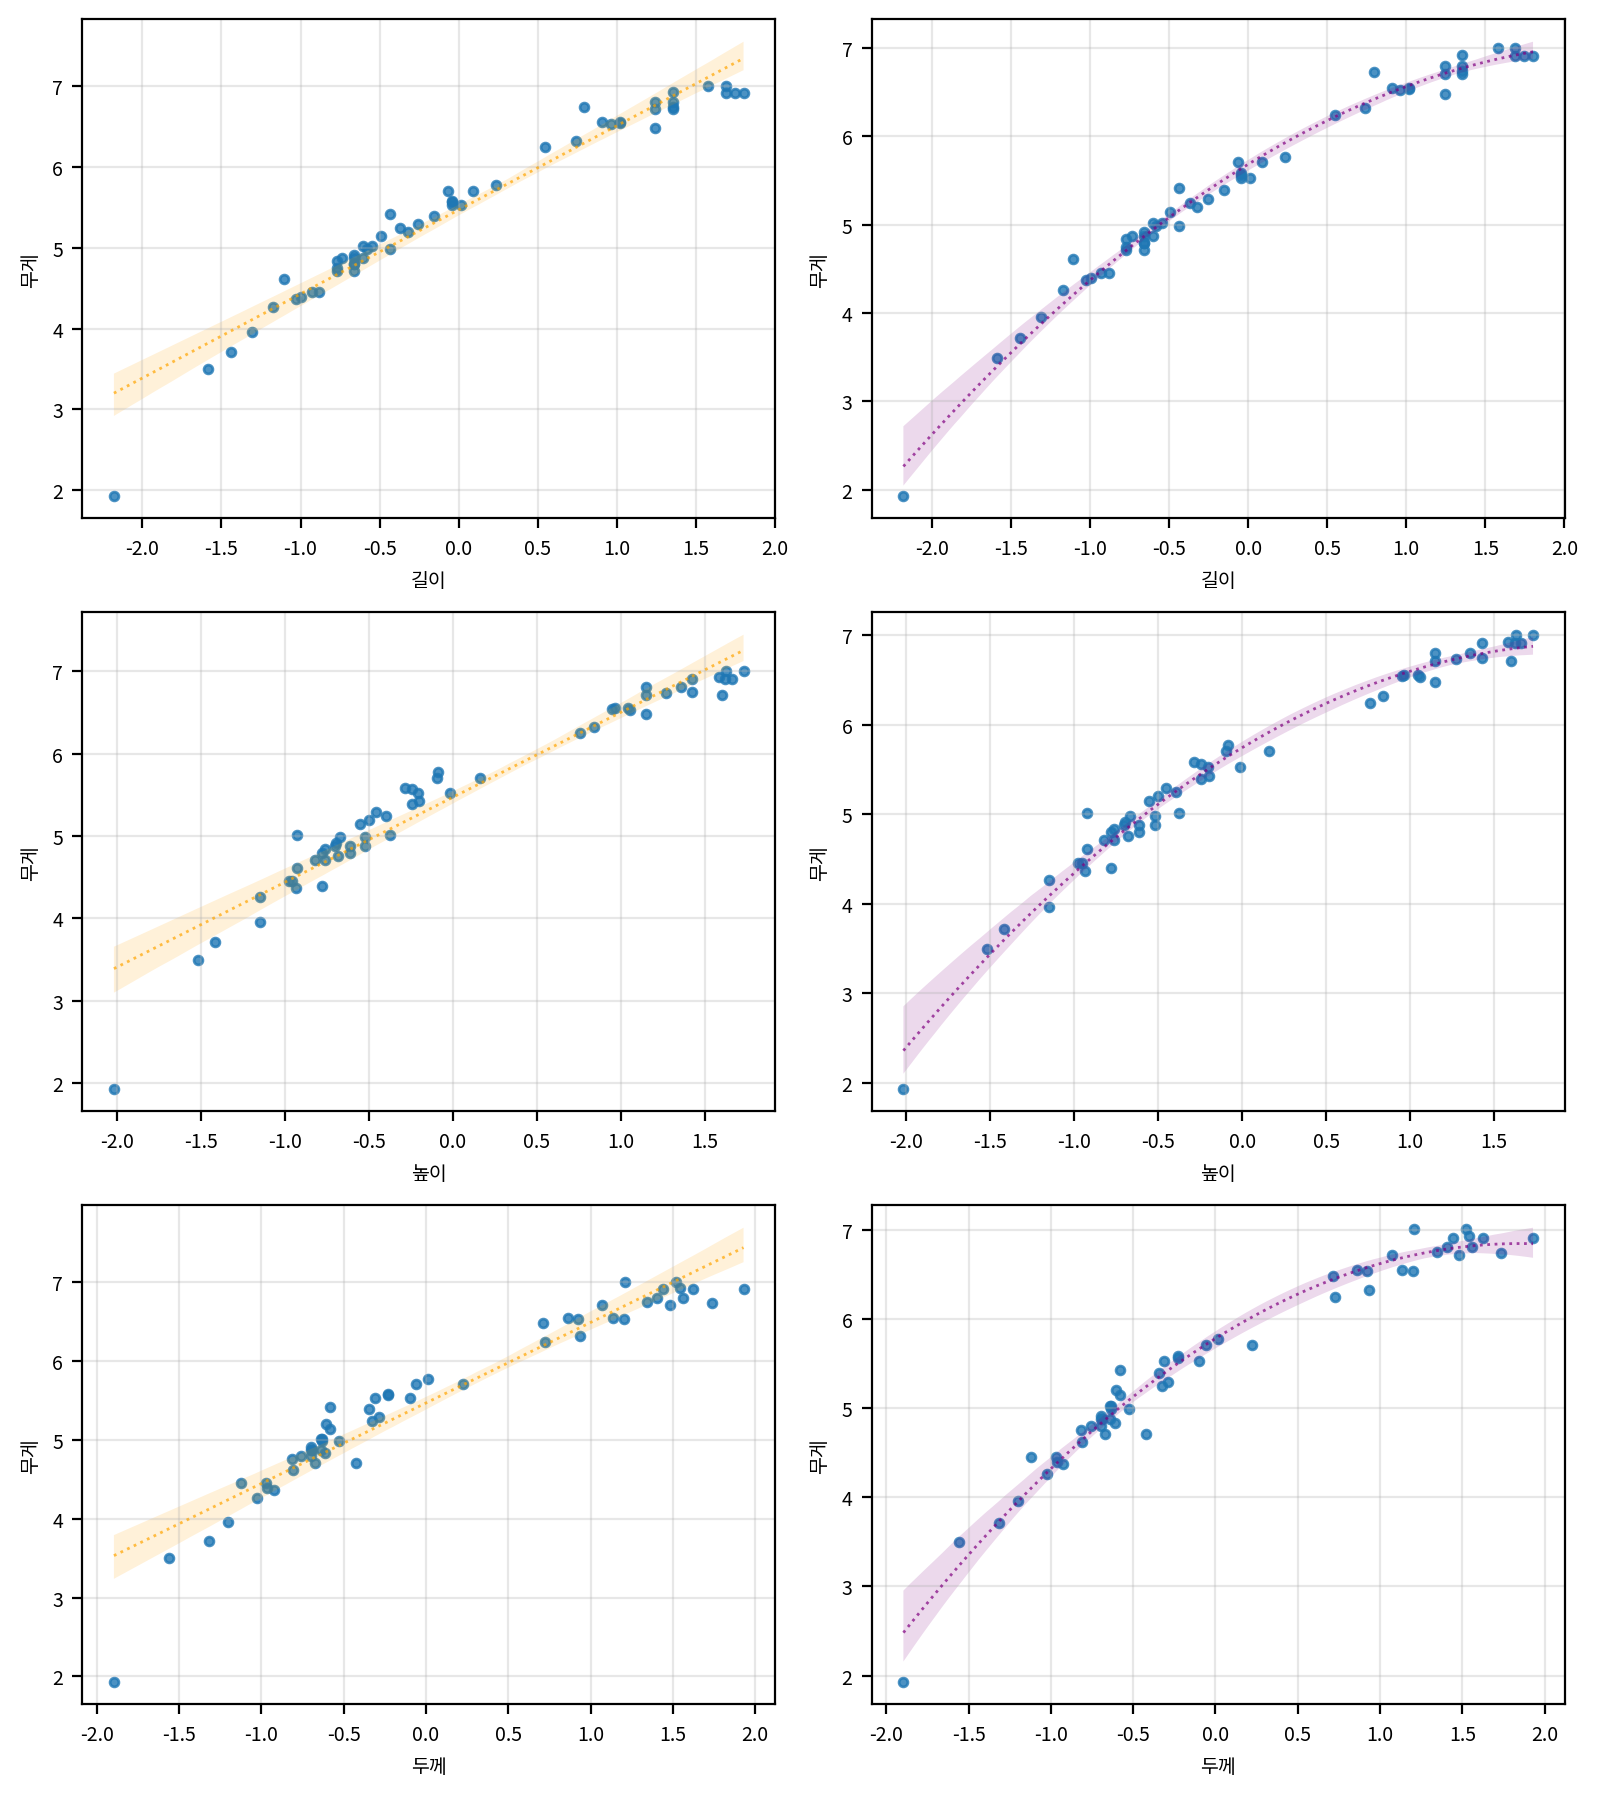

In [9]:
combo = ["길이", "높이", "두께"]
size = len(combo)

figsize = (1600/my_dpi, 600*size/my_dpi)
fig, ax = plt.subplots(size, 2, figsize= figsize, dpi=my_dpi)

for s in range(size):
    sb.regplot(
        data=origin,
        x=combo[s],
        y="무게",
        scatter_kws={"s":10},
        line_kws={"color":"orange", "linewidth":1, "alpha":0.7, "linestyle": ":"},
        ax=ax[s][0],
    )
    ax[s][0].grid(True, alpha=0.3)

    sb.regplot(
        data=origin,
        x=combo[s],
        y="무게",
        order=2,
        scatter_kws={"s":10},
        line_kws = {"color": "purple", "linewidth":1, "alpha":0.7, "linestyle": ":"},
        ax=ax[s][1],
    )
    ax[s][1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

확실히 2차곡선이 더 자연스러워 보인다.

In [11]:
df1 = origin.drop("무게", axis=1).copy()
columns = df1.select_dtypes(include=np.number).columns

for col in columns:
    df1[f"{col}**2"] = df1[col] **2

df1.head()

,길이,높이,두께,길이**2,높이**2,두께**2
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508


In [12]:
for col1, col2 in combinations(columns, 2):
    df1[f"{col1}*{col2}"] = df1[col1] * df1[col2]

df1.head()

,길이,높이,두께,길이**2,높이**2,두께**2,길이*높이,길이*두께,높이*두께
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479,4.396440,4.134088,3.823651
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014,2.410841,2.477625,2.370352
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721,2.043416,1.898188,1.865289
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326,1.500199,1.572822,1.379544
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508,1.346238,1.204588,1.177393


In [13]:
df1["무게"] = origin["무게"]
df1.head()

,길이,높이,두께,길이**2,높이**2,두께**2,길이*높이,길이*두께,높이*두께,무게
0,-2.180225,-2.016507,-1.896175,4.753381,4.066302,3.595479,4.396440,4.134088,3.823651,1.931521
1,-1.587434,-1.518703,-1.560774,2.519946,2.306460,2.436014,2.410841,2.477625,2.370352,3.496508
2,-1.442032,-1.417039,-1.316328,2.079457,2.008000,1.732721,2.043416,1.898188,1.865289,3.713572
3,-1.307815,-1.147103,-1.202633,1.710381,1.315845,1.446326,1.500199,1.572822,1.379544,3.960813
4,-1.173599,-1.147103,-1.026405,1.377334,1.315845,1.053508,1.346238,1.204588,1.177393,4.262680


In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_fit = poly.fit_transform(origin[["길이", "높이", "두께"]])
poly_fit[:3]

array([[-2.18022506, -2.0165074 , -1.89617489,  4.75338133,  4.39643997,
         4.13408802,  4.06630209,  3.8236507 ,  3.59547922],
       [-1.58743393, -1.51870326, -1.56077354,  2.51994649,  2.41084109,
         2.47762488,  2.3064596 ,  2.37035187,  2.43601404],
       [-1.44203233, -1.41703904, -1.31632849,  2.07945725,  2.04341611,
         1.89818824,  2.00799964,  1.86528885,  1.73272069]])

In [15]:
poly.get_feature_names_out()

array(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께',
       '두께^2'], dtype=object)

In [16]:
df2 = DataFrame(poly_fit, columns = poly.get_feature_names_out())

#종속변수 복사
df2["무게"] = origin["무게"]
df2.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479,1.931521
1,-1.587434,-1.518703,-1.560774,2.519946,2.410841,2.477625,2.306460,2.370352,2.436014,3.496508
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721,3.713572
3,-1.307815,-1.147103,-1.202633,1.710381,1.500199,1.572822,1.315845,1.379544,1.446326,3.960813
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508,4.262680


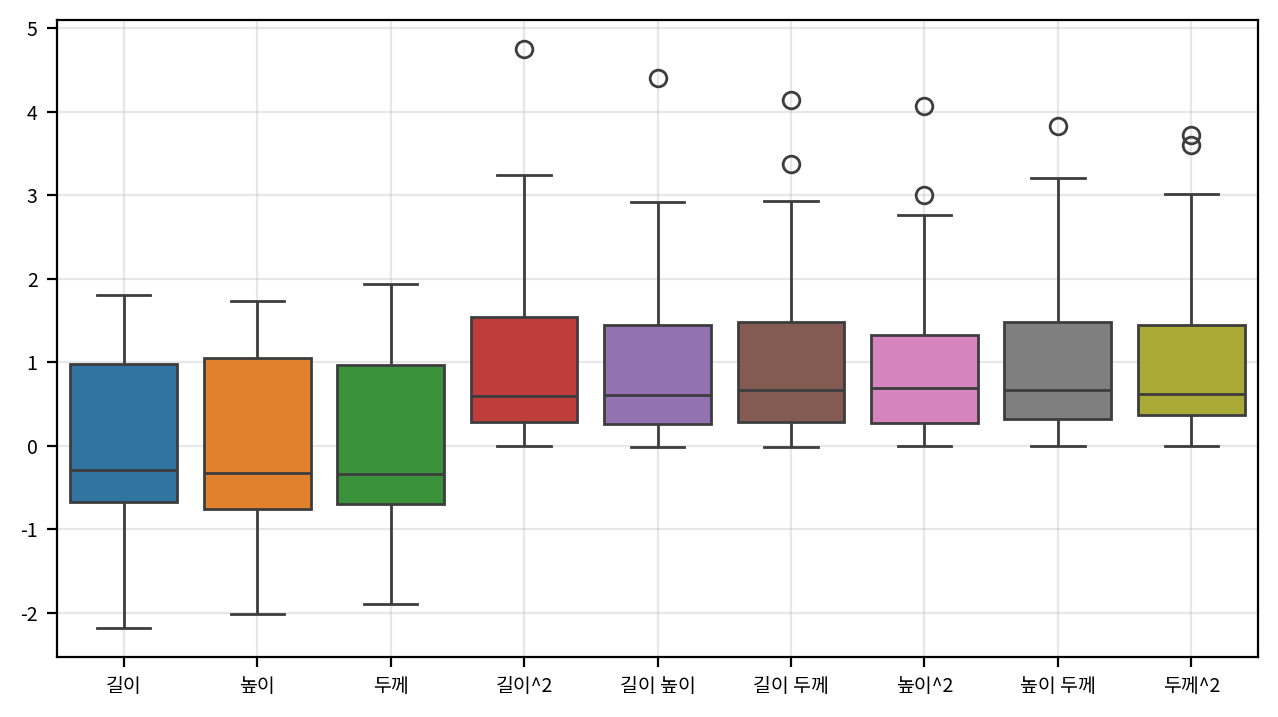

In [17]:
figsize = (1280/ my_dpi, 720/my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)
sb.boxplot(data=df2.drop("무게", axis=1))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [18]:
df = df2.drop("무게", axis=1)
scaler = StandardScaler()
df3 = DataFrame(scaler.fit_transform(df), columns=df.columns)
df3["무게"] = df2["무게"]
df3.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게
0,-2.180225,-2.016507,-1.896175,3.708586,3.556234,3.381553,3.290051,3.122527,2.755507,1.931521
1,-1.587434,-1.518703,-1.560774,1.501806,1.485983,1.608680,1.401792,1.525106,1.524553,3.496508
2,-1.442032,-1.417039,-1.316328,1.066574,1.102893,0.988523,1.081554,0.969957,0.777897,3.713572
3,-1.307815,-1.147103,-1.202633,0.701903,0.536517,0.640291,0.338893,0.436042,0.473845,3.960813
4,-1.173599,-1.147103,-1.026405,0.372830,0.375993,0.246179,0.338893,0.213843,0.056807,4.262680


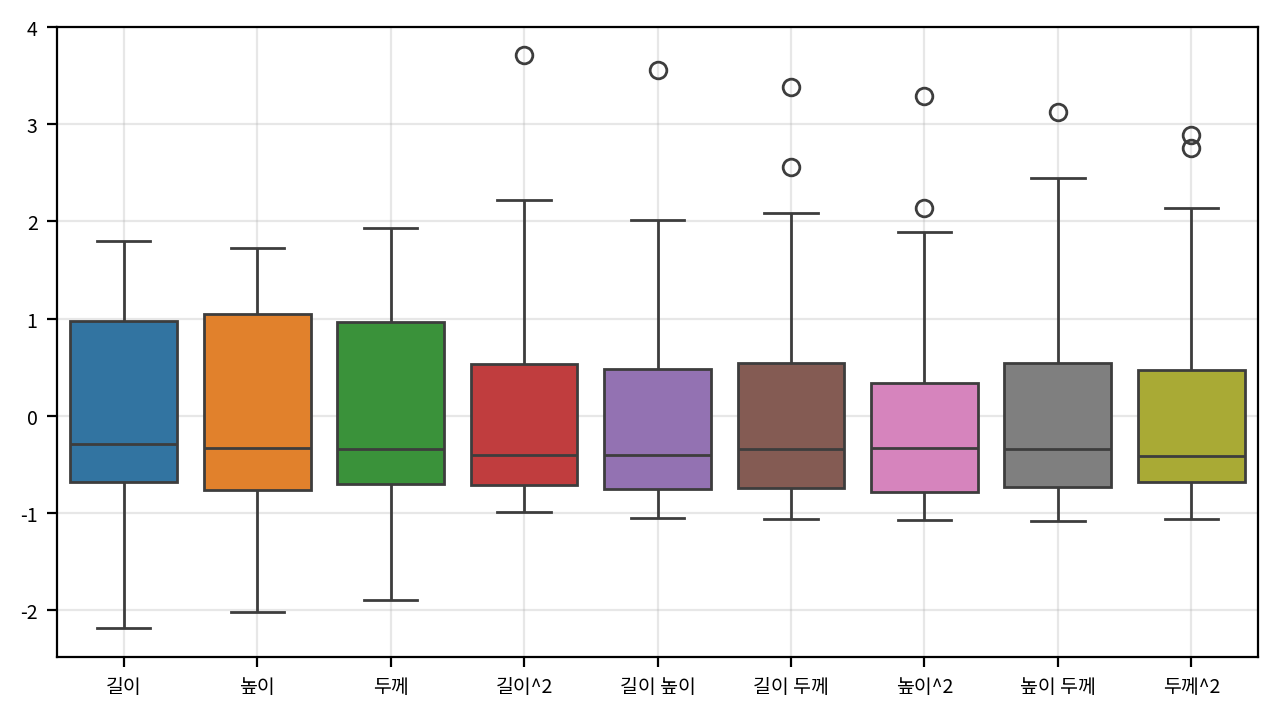

In [19]:
figsize = (1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(1,1,figsize=figsize, dpi=my_dpi)
sb.boxplot(data=df3.drop("무게", axis=1))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [20]:
df3.to_excel("fish_poly_scaled.xlsx", index=False)


In [21]:
df = df3

yname="무게"
x = df.drop(columns=[yname])
y=df[yname]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size =0.25, random_state=52
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((42, 9), (14, 9), (42,), (14,))

## 회귀모델 적합

In [22]:
estimator = LinearRegression(n_jobs=-1)
estimator.fit(x_train, y_train)
estimator

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred = estimator.predict(x_test)

result_df=DataFrame(
    {
        "결정계수"
    }
)